#### - Sobhan Moradian Daghigh
#### - 11/29/2021
#### - PR - EX01 - Q1-Part e.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### Reading data

In [10]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data= np.c_[iris.data, iris.target], columns= iris.feature_names + ['target'])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


#### Ok. Letmme do a group by on the dataset for having 3 classes.

In [12]:
classes = dataset.groupby(by=dataset.iloc[:, -1])
classes.first()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target,,,,,
0.0,5.1,3.5,1.4,0.2,0.0
1.0,7.0,3.2,4.7,1.4,1.0
2.0,6.3,3.3,6.0,2.5,2.0


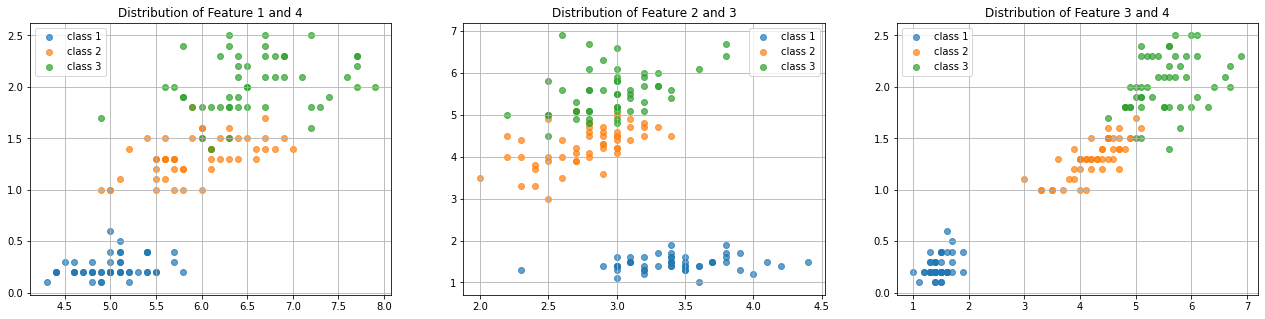

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(22, 5))
figs = [(1, 4), (2, 3), (3, 4)]
for i in range(3):
    for grp, pdf in classes:
        ax[i].scatter(pdf.iloc[:, figs[i][0] - 1], pdf.iloc[:, figs[i][1] - 1], alpha=0.7, label='class {}'.format((int(grp) + 1)))
        ax[i].legend()
        ax[i].grid()
        ax[i].set_title('Distribution of Feature {} and {}'.format(figs[i][0], figs[i][1]))

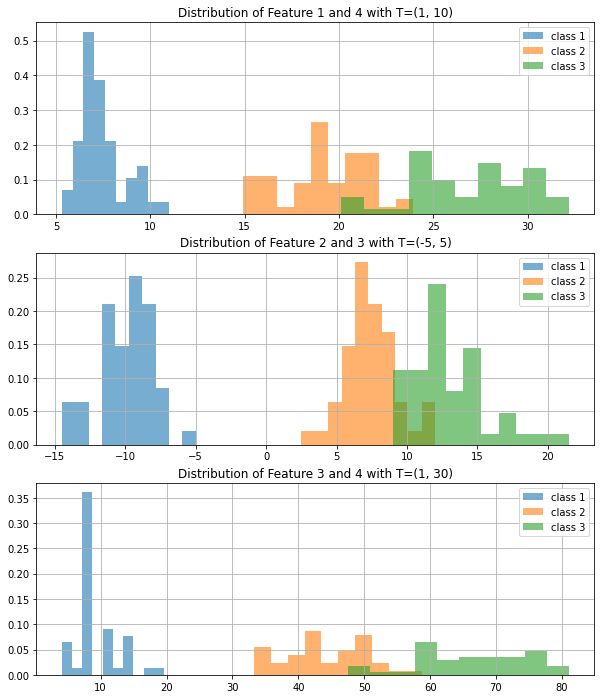

In [159]:
figs = [(1, 4), (2, 3), (3, 4)]
T = [(1, 10), (-5, 5), (1, 30)]

fig, ax = plt.subplots(3, 1, figsize=(10, 12))

for i in range(3):

    dataset['trans'] = dataset.iloc[:, figs[i][0] - 1] * T[i][0] + dataset.iloc[:, figs[i][1] - 1] * T[i][1]
    classes = dataset.groupby(by=dataset.loc[:, 'target'])

    for grp, pdf in classes:
#         ax[i].scatter(pdf.iloc[:, -1], [5] * len(pdf.iloc[:, -1]), alpha=0.7, label='class {}'.format((int(grp) + 1)))
        ax[i].hist(pdf.iloc[:, -1], density=True, bins=10, alpha=0.6, label='class {}'.format((int(grp) + 1)))

        ax[i].legend()
        ax[i].grid()
        ax[i].set_title('Distribution of Feature {} and {} with T={}'.format(figs[i][0], figs[i][1], T[i]))